In [12]:
from conllu_import import read_nerus_conllu_limited
import os


In [53]:
# Путь к вашему файлу nerus_lenta.conllu
file_path = "nerus_lenta.conllu"
if not os.path.exists(file_path):
    print("Файл nerus_lenta.conllu не найден!")
    exit()

sentences = read_nerus_conllu_limited(file_path, max_sents=700000)
print(f"Всего предложений: {len(sentences)}")
    
# Пример одного предложения:
print("Пример:", sentences[0])

Всего предложений: 700000
Пример: (['Вице-премьер', 'по', 'социальным', 'вопросам', 'Татьяна', 'Голикова', 'рассказала', ',', 'в', 'каких', 'регионах', 'России', 'зафиксирована', 'наиболее', 'высокая', 'смертность', 'от', 'рака', ',', 'сообщает', 'РИА', 'Новости', '.'], ['O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O'])


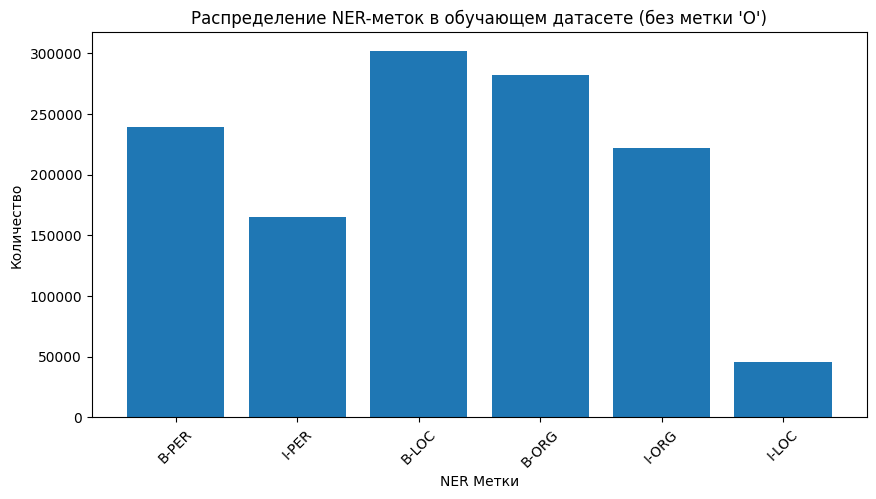

In [54]:
import matplotlib.pyplot as plt
from collections import Counter

# sentences[0] = (['Вице-премьер', 'по', 'социальным', 'вопросам', 'Татьяна', 'Голикова', 'рассказала', ',', 'в', 'каких', 'регионах', 'России', 'зафиксирована', 'наиболее', 'высокая', 'смертность', 'от', 'рака', ',', 'сообщает', 'РИА', 'Новости', '.'], ['O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O'])
# Подсчитываем количество каждого тега в датасете, исключая метку "O"
tag_counts = Counter(
    tag
    for tokens, tags in sentences          # распаковываем кортеж списков
    for tag in tags                        # итерируемся по списку тегов
    if tag != "O"
)
# Создаём график
plt.figure(figsize=(10, 5))
plt.bar(tag_counts.keys(), tag_counts.values())
plt.xlabel("NER Метки")
plt.ylabel("Количество")
plt.title("Распределение NER-меток в обучающем датасете (без метки 'O')")
plt.xticks(rotation=45)
plt.show()


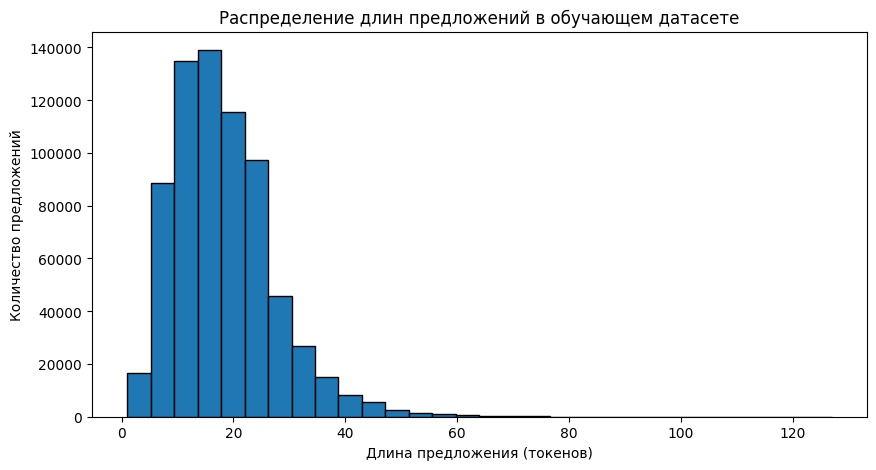

In [55]:
sentence_lengths = [len(sent) for sent, _ in sentences]

plt.figure(figsize=(10, 5))
plt.hist(sentence_lengths, bins=30, edgecolor='black')
plt.xlabel("Длина предложения (токенов)")
plt.ylabel("Количество предложений")
plt.title("Распределение длин предложений в обучающем датасете")
plt.show()


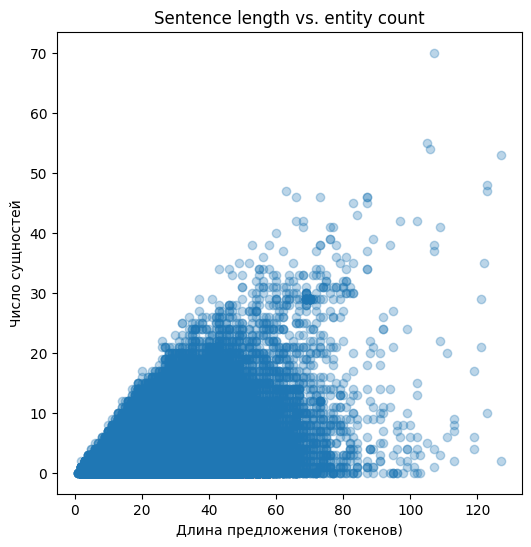

In [57]:
import matplotlib.pyplot as plt

lengths = [len(tokens) for tokens, _ in sentences]
entity_counts = [sum(1 for tag in tags if tag!='O') for _, tags in sentences]

plt.figure(figsize=(6,6))
plt.scatter(lengths, entity_counts, alpha=0.3)
plt.xlabel("Длина предложения (токенов)")
plt.ylabel("Число сущностей")
plt.title("Sentence length vs. entity count")
plt.show()


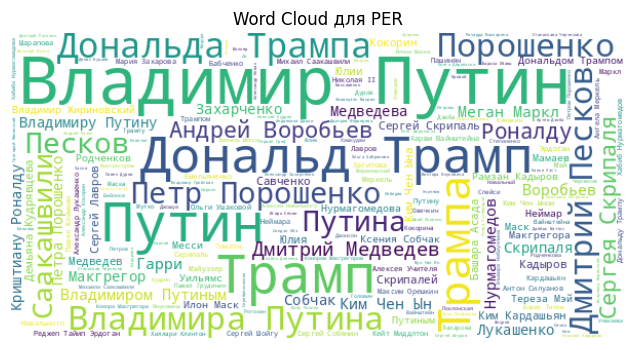

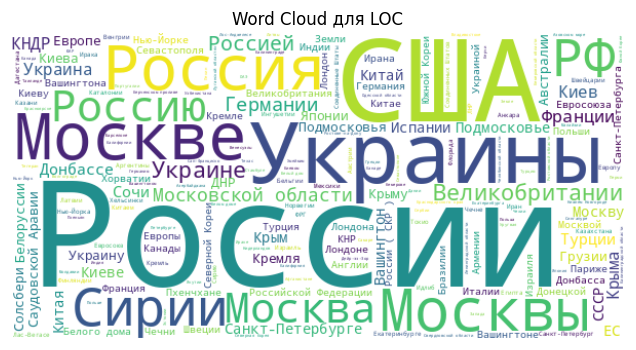

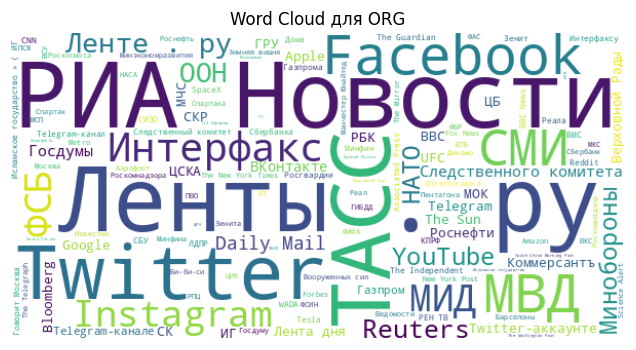

In [58]:
from wordcloud import WordCloud

for ent_type in ["PER","LOC","ORG"]:
    # формируем частоты только для данного типа
    freq = Counter(entity_forms.get(ent_type, []))
    if not freq: continue
    
    wc = WordCloud(width=600, height=300, background_color='white')\
            .generate_from_frequencies(freq)
    
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud для {ent_type}")
    plt.show()
